# Initialisation du TPE

Le TPE sera réalisé en [Python](https://www.python.org/), en se basant sur :
1. Un graphe représenté sous forme de matrice CSV
2. La librairie [Pandas](http://pandas.pydata.org/), qui permet de charger facilement des fichiers CSV
3. La libraire [igraph](http://igraph.org/python/), qui implémente l'agorithme de Dijkstra pour calculer le chemin de plus court d'un point à un autre.
4. Le tout est présenté sous forme de notebook [Jupyter](http://jupyter.org/), qui permet de mixer du code et de la documentation, et d'exécuter le code par étape

## Travaux préparatoires

*Décrire ici tout ce qu'il faut installer pour que ça marche*

## Première étape : initialisation

La première étape consiste à indiquer au langage Python quelles libraires il doit utiliser en utilisant la directive `import`.
Nous allons importer les libraires listées ci-dessus.

In [7]:
from igraph import *
import igraph
import pandas as pd

print igraph.__version__

0.7.1


## Deuxième étape : chargement de la matrice

La matrice préalablement préparée au format CSV, avec des points-virgules en tant que séparateur, est chargé avec la libraire Pandas.
On indique à Pandas :
1. L'emplacement du fichier
2. La ligne qui contient les étiquettes de données (le nom des noeuds du graphe)
3. De même pour la colonne
4. Le séparateur de données (le point-virgule)

In [8]:
#Chargement de la matrice
matrice = pd.read_csv('C:/Users/Yann/OneDrive/Documents/Charlotte/matrice.csv', header=0, index_col=0, sep=';')

#Affichage de la matrice sous forme de tableau
print matrice

   A  B  C  D
A  0  0  0  0
B  1  0  0  0
C  3  1  0  0
D  0  1  2  0


In [10]:
# Get the values as np.array, it's more convenenient.
valeurs = matrice.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
graphe = igraph.Graph.Adjacency((valeurs > 0).tolist())

In [59]:
print graphe

IGRAPH DNW- 4 5 --
+ attr: label (v), name (v), weight (e), width (e)
+ edges (vertex names):
B->A, C->A, C->B, D->B, D->C


In [55]:
res = Graph.shortest_paths(graphe, source='A',target='D', mode='IN', weights = valeurs[valeurs.nonzero()])
print res
Graph.get_shortest_paths(graphe.vertex_attributes,v=result, to='D')

[[2.0]]


TypeError: only numbers, vertex names or igraph.Vertex objects can be converted to vertex IDs

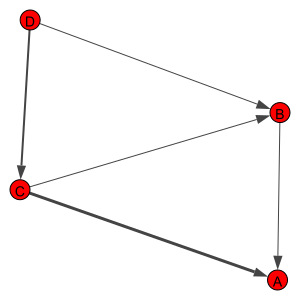

In [47]:
# Add edge weights and node labels.
graphe.es['weight'] = valeurs[valeurs.nonzero()]
graphe.vs['label'] = matrice.index # or a.index/a.columns
graphe.vs['name'] = graphe.vs['label']
graphe.es['width'] = valeurs[valeurs.nonzero()]

layout = graphe.layout('kk')
plot(graphe, layout = layout, bbox = (300, 300), margin = 20, autocurve = True, labels = True)